# Pymaceuticals Inc.
---

### Analysis

Based on the data: there were 248 different mice subjected to different drug regimens, with 1 duplicated mouse data removed. The demographic was evenly distributed, with 51% of the mice being male and 49% being female.

In reference to Capomulin, which is our drug of interest, these 3 observations were made:

First, the data shows that as the mice were subjected with Capomulin over time, their tumor volume also decreased over time. This indicates that Capomulin is an effective drug regimen given an extended timeframe.

Second, the scatterplot indicates that the heavier a mouse is, the more tumor volume they have in their system (shown by a positive relationship). This is also supported with a correlation value of 0.84 which indicates that there is a strong connection between their weight and the tumor volume.

Lastly,  according to the data, there was only 1 potential outlier discovered for the drug Infubinol. This indicates that the data gathered and analyzed for Capomulin are accurate and may be used in a generalizing statement.

In conclusion, Capomulin is an effective treatment for squamous cell carcinoma (SCC), so long as we keep into account the other factors that could sway the results (e.g. weight and the amount of time the drug has been administered). 

In [257]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousemer = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mousemer.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [258]:
# Checking the number of mice.
mouseunique = mousemer['Mouse ID'].nunique()
mouseunique

249

In [259]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mousemer.loc[mousemer.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [260]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_data = mousemer.loc[mousemer["Mouse ID"] == "g989"]
all_duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [261]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse = mousemer[mousemer['Mouse ID'].isin(duplicate_mouse_ids)==False]
cleanmouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [262]:
# Checking the number of mice in the clean DataFrame.
mouseno = cleanmouse['Mouse ID'].nunique()
mouseno

248

## Summary Statistics

In [263]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meanmouse = mousemer.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medmouse = mousemer.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
varmouse = mousemer.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdmouse = mousemer.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
semmouse = mousemer.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mousesum = pd.DataFrame({"Mean Tumor Volume":meanmouse,
                         "Median Tumor Volume":medmouse,
                         "Tumor Volume Variance":varmouse,
                         "Tumor Volume Std. Dev.":stdmouse,
                         "Tumor Volume Std. Err.":semmouse})

mousesum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [264]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
meaniemouse = mousemer.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
meaniemouse
# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

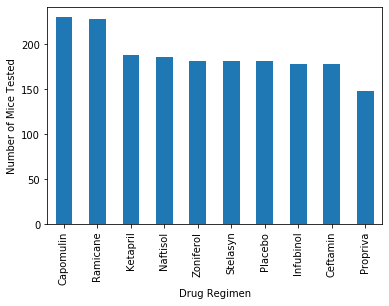

In [265]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugcounts = cleanmouse['Drug Regimen'].value_counts()
drugcounts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

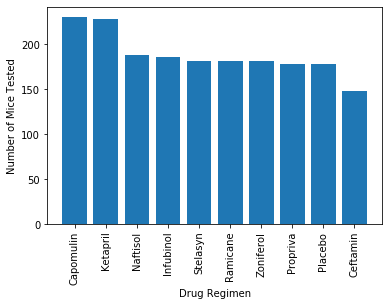

In [266]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = cleanmouse['Drug Regimen'].unique()
y_axis = cleanmouse['Drug Regimen'].value_counts()
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

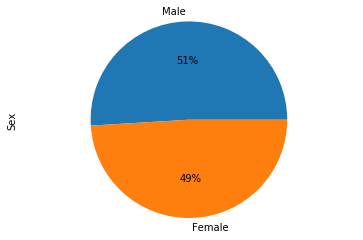

In [267]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mousesex = cleanmouse['Sex'].value_counts()
mousesex.plot(kind="pie", autopct='%1.0f%%')
plt.axis('equal')
plt.show()

([<matplotlib.patches.Wedge at 0x7f91a3f60450>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51%'),
  Text(0.018044734954153686, -0.5997285948997549, '49%')])

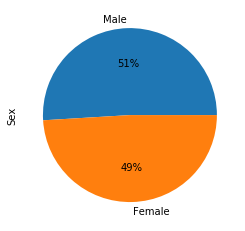

In [268]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Male', 'Female']
plt.ylabel('Sex')
plt.pie(mousesex, explode=None, labels=labels, autopct='%1.0f%%')


## Quartiles, Outliers and Boxplots

In [269]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finaltumor = pd.DataFrame(cleanmouse.groupby(["Mouse ID"]).max()["Timepoint"])
#finaltumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedmouse = finaltumor.merge(cleanmouse,on=['Mouse ID', 'Timepoint'],how="left")
mergedmouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [270]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvollist =[]

# Locate the rows which contain mice on each drug and get the tumor volumes
for drugs in druglist:
    tumorvol=mergedmouse.loc[mergedmouse['Drug Regimen']==drugs,"Tumor Volume (mm3)"]
    tumorvollist.append(tumorvol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles=tumorvol.quantile([.25, .5, .75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr= upperq-lowerq
    lower_bound= lowerq - (1.5*iqr)
    upper_bound= upperq + (1.5*iqr)
    
# Determine outliers using upper and lower bounds
    drugoutliers = tumorvol.loc[(tumorvol > upper_bound) | (tumorvol < lower_bound)]
    
    #if len(drugoutliers) != 0:
    print(f"{drugs}'s potential outliers: {drugoutliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


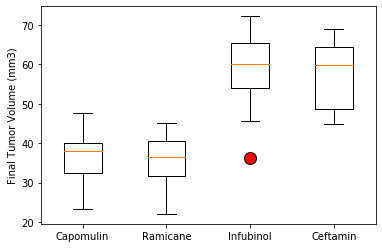

In [271]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orangeline=dict(markerfacecolor="red", markersize=12)
plt.boxplot(tumorvollist, labels=druglist, flierprops=orangeline)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

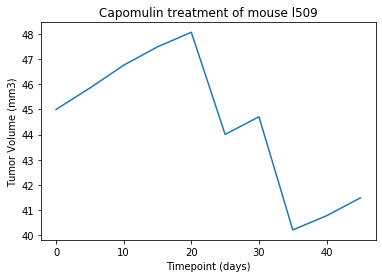

In [272]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = cleanmouse[cleanmouse['Drug Regimen'] == 'Capomulin']
#capomulin_mice.head(20)

chosenmouse=capomulin_mice[capomulin_mice['Mouse ID'] == 'l509']
#chosenmouse.head(5)
y_axis = chosenmouse['Tumor Volume (mm3)']
x_axis = chosenmouse['Timepoint']
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

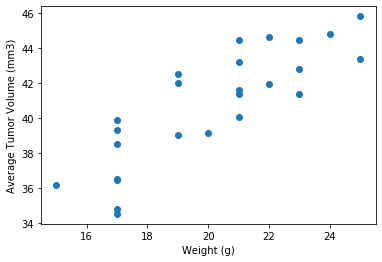

In [273]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avecapo = capomulin_mice.groupby(['Mouse ID']).mean()
x_values = avecapo["Weight (g)"]
y_values = avecapo['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [274]:
correlation=round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

The correlation between mouse weight and the average tumor volume is 0.84


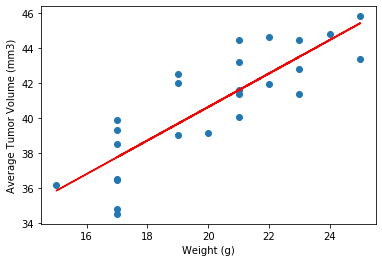

In [275]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
linmice = st.linregress(x_values, y_values)
y_value=x_values*linmice[0]+linmice[1]
plt.scatter(x_values, y_values)
plt.plot(x_values,y_value,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()